## Dirichlet Distribution
The [Dirichlet distribution](https://en.wikipedia.org/wiki/Dirichlet_distribution) (DD) is a multivariate generalization of the beta distribution. It can be denoted as $Dir(\alpha)$.<br>
The PDF is defined as:
$$\{x_1,\dots,x_K\} \sim \frac{1}{B(\alpha)}\prod_{i=1}^{K} x_i^{\alpha_i-1} $$
where $K\geq2$, $\alpha_i>0$ and $x_i \in (0,1)$. The parameter $\alpha$ is a vector of real numbers $\alpha_1, \alpha_2...\alpha_K$. $\alpha_i$ is called the concentration parameters.<br>
The support of the Dirichlet distribution is the set of K-dimensional vectors $x$ whose entries are real numbers in the interval $(0,1)$ and
where $\sum\limits_{i=1}^n x_i = 1$. These can be viewed as the probabilities of a K-way categorical event.

The Dirichlet distribution is related to the Beta distribution as it's pdf can seen below: 
$$ \{x_1,x_2=(1-x_1)\} \sim \frac{1}{B(\alpha, \beta)} x_1^{\alpha-1} x_2^{\beta-1} $$
the distributions are the same if $K=2$.
The marginal distribution of the Dirichlet distribution is a Beta distribution. The example below is a sample drawn from a $Dir( \alpha=[2.5, 10] )$ where sample size is $N=10000$

https://stats.stackexchange.com/questions/244917/what-exactly-is-the-alpha-in-the-dirichlet-distribution

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Latex

sns.set(color_codes=True)
beta = np.random.beta(a=2.5, b=10, size=10000)
dirichlet = np.random.dirichlet(alpha=[3,10], size=10000)

# beta_graph = sns.distplot(beta, kde=False, fit=stats.gamma);

s = ""
for i, d in enumerate(dirichlet[1:4]):
    s = s + "$$x_{:d} = [{:1.3f},{:1.3f}]$$".format(i, d[0], d[1])
s = s + "$$\\vdots$$"
s = s + "$$x_{N-1}=[0.177,0.823]$$"
s = "sample drawn from $Dir( \\alpha=[2.5, 10] )$:" + s
Latex(s)


<IPython.core.display.Latex object>

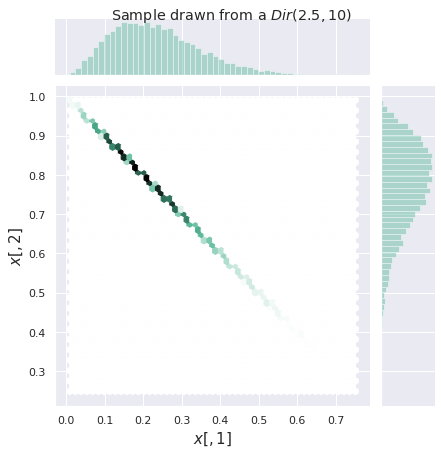

In [2]:
graph = sns.jointplot(x=dirichlet[:,0], y=dirichlet[:,1], kind='hex', color="#4CB391")
graph.set_axis_labels('$x[,1]$', '$x[,2]$', fontsize=15)
graph.fig.suptitle('Sample drawn from a $Dir(2.5,10)$', y=1);

$x[,1]$ are the first column in the vector $x_i$, $x[,2]$ are the second column.<br>
The marginal distribution are shown according to there axis, they are distributed $Beta(a=2.5, b=10)$

In [3]:
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import pandas as pd
from plotly import tools
import warnings
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

dir_data1 = np.random.dirichlet(alpha=[1, 1, 1], size=400).transpose()
dir_data2 = np.random.dirichlet(alpha=[10, 10, 10], size=400).transpose()
dir_data3 = np.random.dirichlet(alpha=[1, 10, 5], size=400).transpose()

def create_trace(x, y, z, scene_name):
    trace = go.Scatter3d(
            z=z,
            x=x,
            y=y,
            mode='markers',
            scene=scene_name,
            marker=dict(
                color='rgb(77, 179, 145)',
                size=3,
                symbol='circle',
                line=dict(
                    color='rgb(50, 50, 50)',
                    width=0.001
                ),
                opacity=1
            )
        )
    return trace

trace1 = create_trace(x=dir_data1[0], y=dir_data1[1], z=dir_data1[2], scene_name="scene1")
trace2 = create_trace(x=dir_data2[0], y=dir_data2[1], z=dir_data2[2], scene_name="scene2")
trace3 = create_trace(x=dir_data3[0], y=dir_data3[1], z=dir_data3[2], scene_name="scene3")

scene = dict(xaxis = dict(title='x[,1]', range=[0, 1], backgroundcolor="rgb(234, 234, 244)", showbackground=True, gridcolor="rgb(100,100,100)"),
                 yaxis = dict(title='x[,2]', range=[0, 1], backgroundcolor="rgb(234, 234, 244)", showbackground=True, gridcolor="rgb(100,100,100)"),
                 zaxis = dict(title='x[,3]', range=[0, 1], backgroundcolor="rgb(234, 234, 244)", showbackground=True, gridcolor="rgb(100,100,100)"),
                )

fig = tools.make_subplots(rows=1, cols=3, specs=[[{'is_3d': True}, {'is_3d': True}, {'is_3d': True}]], horizontal_spacing = 0.001)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig['layout']['scene1'].update(scene)
fig['layout']['scene2'].update(scene)
fig['layout']['scene3'].update(scene)
fig['layout'].update(title='Dir(alpha=[1, 1, 1])     Dir(alpha=[10, 10, 10])     Dir(alpha=[1, 10, 5])', height=500, width=1200, showlegend=False)

p = py.iplot(fig);
p

## Dirichlet Process
The [Dirichlet Process](https://en.wikipedia.org/wiki/Dirichlet_process) (DP) can be considered a way to generalize the Dirichlet distribution. It can be denoted as $DP(H,\alpha )$ where $H$ is a base distribution and $\alpha$ is a positive real number called the concentration parameter.<br> The expected value of the process is the base distribution. The DP draws a distribution similar to the base distribution in the same way a normal distribution draws values around it is mean. The distributions drawn from the DP are discrete even if the base distribution is continuous. The scaling parameter ($\alpha$) are inversely closely related to values drawn from the DP are to the base distribution.

Given a measurable set $S$, a base probability distribution $H$ and a positive real number $\alpha$, the Dirichlet Process can be expressed as $DP(H, \alpha)$. A sample drawn from the process with a infinite amount of draws is a probability distribution over $S$, such that the following holds: For any measurable finite partition of $S$, denoted $\sum_{i=1}^n S_i$, if:
$$X \sim DP(H, \alpha)$$
then
$X_{S_1}, \dots, X_{S_n} \sim Dir(\alpha H_{S_1}, \dots ,\alpha H_{S_n})$

As an example, if DP had a base distribution that was normally distributed as $H_0\sim \mathcal{N}(0,1)$. Let $H$ be a sample drawn from a $DP(H_0)$ and partition S, which is the support of a normal distribution, as $S_1=(-\infty, -1]$, $S_2=(-1, 1]$, and $S_3=(1, \infty]$ then<br>

$H_{S_1}, H_{S_2}, H_{S_3} \sim \text{Dir}\left(\alpha\,\text{erf}(-1), \alpha\,(\text{erf}(1) - \text{erf}(-1)), \alpha\,(1-\text{erf}(1))\right)$

## Alternative viewpoints of the Dirichlet Process

The Dirichlet process can be defined other ways as well, not just with the formal definition.

We can draw a sample $X$ from a Dirichlet process $\text{DP}(H, \alpha)$ by drawing a countably infinite number of draws $x_k$ from $H$ and setting:

$$f(x)=\sum_{k=1}^\infty \beta_k \cdot \delta_{x_k}(x)$$

where $\{x_k\}^\infty_{k=1}$ are draws from the base distribution $H$ 
<br>the $\beta_k$ are drawn weights from a $Beta(1,\alpha)$ so that $\sum \beta_k = 1$<br>
$\delta_{x_k}$ is an indicator function centered on $x_k$, it is zero everywhere except for $\delta_{x_k}(x_k) = 1$<br>
$x_k$ are draws from the base distribution $H$

The sample can be drawn from a Chinese Restaurant Process (CRP), Stick-Breaking Process (SBP) or the Pólya urn scheme. These processes serve to retrieve samples from a DP.

#### Stick-Breaking Process

The weights ($\beta_k$ values) is associated with the prior base distribution it is proportional to $\alpha$.

To generate $\beta_k$ according to a stick-breaking process we define $\pi_k$ to be a draw from $\text{Beta}(1,\alpha)$ where $\pi_1$ is equal to $\beta_1$. Successive values are defined recursively as

$$\beta_k=\pi_k \prod_{j=1}^{k-1}(1-\pi_j).$$

However, by noting that the $\beta_k$ values are _positive_ values summing to 1, we note that, in expectation, they must get increasingly small as $k\rightarrow\infty$. Thus, we can reasonably approximate a sample $X \sim DP(H, \alpha)$ by drawing _enough_ such that $\sum_{k=1}^K \beta_k\approx 1$.

#### Chinese restaurant process

Another method to generate the weights is with the CRP. Imagine a restaurant with an infinite number of circular tables, each with infinite capacity. Each new customer (a drawn from a base distribution $H$) is seated at a table.

* The first customer always sits at the first table. 

* The next customer either sits at the same table with customer 1 or the next table. The probability of been seated at a new table where there are no customers is ${\frac  {\alpha }{\alpha +n-1}}$
where $n$ is the total number of people already seated, and $\alpha$ (the concentration parameter) is giving and its value does not change<br>
The probability of been seated at a table where there is already customers is
${\frac {c}{\alpha + n -1}}$ where $c$ is the number of people at the table. At time n, then customers have been partitioned among $m \ge n$ tables (or blocks of the partition).

When this process converges, the ratio of the number people of each group will have simulated the weights $\sum \beta_k = 1$:<br>
$\beta = \{\frac {c_1} {n + \alpha}, \frac {c_2} {n + \alpha}, \dots, \frac {c_k} {n + \alpha} \}$ where $k$ is the number of tables(weights) and $n$ the number of customers.

An example of the CRP can be found here:
[Polya Restaurant Scheme for DD and DP](http://topicmodels.west.uni-koblenz.de/ckling/tmt/crp.html)

#### The Pólya urn scheme

Another way to visualize the Dirichlet process and Chinese restaurant process is as a modified Pólya urn scheme. Imagine that we start with an urn filled with $\alpha$ black balls. Then we proceed as follows:

* Each time we need an observation, we draw a ball from the urn.
* If the ball is black, we generate a new (non-black) color uniformly, label a new ball this color, drop the new ball into the urn along with the ball we drew, and return the color we generated.
* Otherwise, label a new ball with the color of the ball we drew, drop the new ball into the urn along with the ball we drew, and return the color we observed.

The resulting distribution over colors is the same as the distribution over tables in the Chinese restaurant process. Furthermore, when we draw a black ball, if rather than generating a new color, we instead pick a random value from a base distribution $H$ and use that value to label the new ball, the resulting distribution over labels will be the same as the distribution over values in a Dirichlet process. 

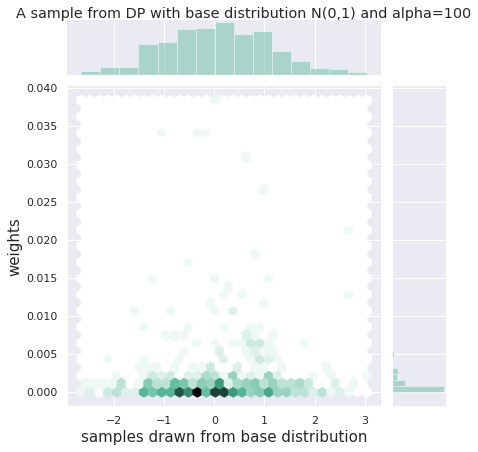

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import beta, norm
import numpy as np
import seaborn as sns
from scipy import stats
import pandas as pd

def dirichlet_sample_approximation(base_measure, alpha, tol=0.01):
    betas = []
    pis = []
    betas.append(beta(1, alpha).rvs())
    pis.append(betas[0])
    while sum(pis) < (1.-tol):
        s = np.sum([np.log(1 - b) for b in betas])
        new_beta = beta(1, alpha).rvs()
        betas.append(new_beta)
        pis.append(new_beta * np.exp(s))
    pis = np.array(pis)
    thetas = np.array([base_measure() for _ in pis])
    return pis, thetas

def plot_normal_dp_approximation(alpha):
    plt.figure()
    plt.title("Dirichlet Process Sample with N(0,1) Base Measure")
    plt.suptitle("alpha: %s" % alpha)
    pis, thetas = dirichlet_sample_approximation(lambda: norm().rvs(), alpha)
    pis = pis * (norm.pdf(0) / pis.max())
    plt.vlines(thetas, 0, pis, )
    X = np.linspace(-4,4,100)
    plt.plot(X, norm.pdf(X))

'''
Generate weights to use in generating samples of the Dirichlet Process
'''
def stick_breaking_process(alpha, tol=0.01):
    # break points are in the stick
    betas = []
    betas.append(beta(1, alpha).rvs())
    
    # length of each stick
    s_lengths = []
    s_lengths.append(betas[0])
    while sum(s_lengths) < (1.-tol):
        s = np.sum([np.log(1 - b) for b in betas])
        b = beta(1, alpha).rvs()
        betas.append(b)
        s_lengths.append(b * np.exp(s))
    return s_lengths

def dirichlet_process_sample(alpha, base_distribution=lambda: norm().rvs(), tol=0.01):
    weights = stick_breaking_process(alpha, tol)
    base_samples = np.array([base_distribution() for _ in weights])
    return weights, base_samples

weights, base_samples = dirichlet_process_sample(alpha=100)
# plt.vlines(base_samples, 0, weights, )
graph = sns.jointplot(x=base_samples, y=weights, kind='hex', color="#4CB391")
graph.set_axis_labels('samples drawn from base distribution', 'weights', fontsize=15)
graph.fig.suptitle('A sample from DP with base distribution N(0,1) and alpha=100', y=1)
plt.show();

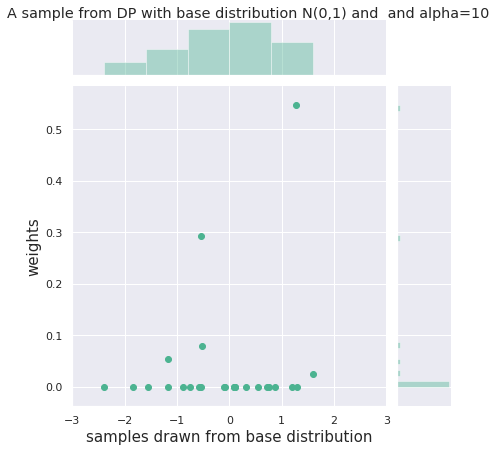

In [5]:
weights, base_samples = dirichlet_process_sample(alpha=1, tol=0.000000001)

graph = sns.jointplot(x=base_samples, y=weights, kind='scatter', color="#4CB391", xlim = (-3, 3))
graph.set_axis_labels('samples drawn from base distribution', 'weights', fontsize=15)
graph.fig.suptitle('A sample from DP with base distribution N(0,1) and  and alpha=10', y=1)
plt.show();

## Dirichlet Process as a Mixture Model
A DP can also be used for doing clustering, a sample drawn from the DP can be viewed as the centers of clusters. The bottom right graph shows three draws from a DP, in this example each of these draws represents a Gaussian cluster in the base distribution. With the DP you are inferring the weight of each cluster and the mean of that cluster. The DP can infer an infinite amount of clusters.


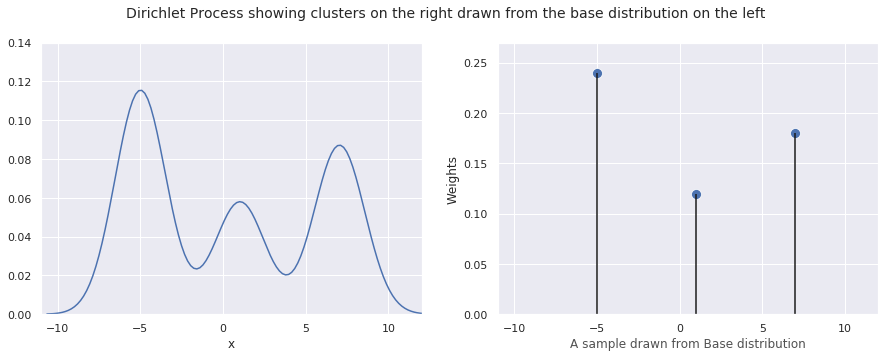

In [6]:
import matplotlib.pyplot as plt

x = np.random.normal(loc=-5.0, scale=0.5,size=400)
x = np.append(x, np.random.normal(loc=1.0, scale=0.5,size=200))
x = np.append(x, np.random.normal(loc=7.0, scale=0.5,size=300))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5));
f.suptitle('Dirichlet Process showing clusters on the right drawn from the base distribution on the left', fontsize=14);

#############
# Right Plot #
#############
g = sns.scatterplot(x=[-5, 1, 7], y=[0.24, 0.12, 0.18], s=100, cmap = 'seismic', ax=ax2);

g.set(ylim=(0, 0.27));
g.set(xlim=(-11, 12));
g.set_xlabel("A sample drawn from Base distribution",size=12,alpha=0.8);
g.set_ylabel("Weights", size=12);

#############
# Left Plot #
#############
gg = sns.kdeplot(x, ax=ax1);
gg.set(ylim=(0, 0.14));
gg.set(xlim=(-11, 12));
gg.set_xlabel("x", size=12);

plt.vlines([-5, 1, 7], 0, [0.24, 0.12, 0.18], )

## Gibbs sampling

Suppose we have two parameters $\theta_1​ \: and \: \theta_2$​​ and some data $\mathbf{x}$. The goal is to find the posterior distribution of $p(\theta_1​​​, \theta_2 | \mathbf{x})$. To do this in a Gibbs sampling regime we need to work out the conditional distributions $p(\theta_1 | \theta_2, \mathbf{x})$ and $p(\theta_2 | \theta_1, \mathbf{x})$. 

Gibbs steps:

- Pick some initial $\theta_2^{(i)}$
- draw $\theta_1^{(i+1)} \sim p(\theta_1 | \theta_2^{(i)}, \mathbf{x})​​$
- draw $\theta_2^{(i+1)} \sim p(\theta_2 | \theta_1^{(i+1)}, \mathbf{x})$

Then increment _i_ and repeat $K$ times to draw $K$ number of times. This is equivalent to drawing new values for a given variable while holding all others constant.

The advantage over other MCMC methods (i.e. Metropolis-Hastings) is that no tuning parameters are required. The disadvantage is that $p(\theta_1 | \theta_2, \mathbf{x})$ and $p(\theta_2 | \theta_1, \mathbf{x})$ have to be derived, which does not always exist.

We will be using this example above (Gaussian mixture model) as an example to do Gibbs sampling. In this section, I will describe the pdf and the conditional distributions for the parameters

### A mixture of Gaussians

Let $C$ be the number of clusters, N the number of observations. Let the mixing proportions of the clusters be $\pi_c$. It describes the proportion of points that occur in cluster $c$. 
Each cluster $c$ corresponds to a parameters describing the cluster. Mean $\mu_c$, variance $\sigma_c$, and 'size' $\pi_c$. 
The probability distribution can be writing as:

$$
p(\mathcal{x}) = \sum_{c=1}^C \pi_c \ \mathcal{N}(x; \mu_c, \sigma_c)
$$

Let $z$ be the latent variable(we do not observe this variable), and it is the assignment of each data point to a cluster. The presence in $z$ helps to explain patterns in the $x$, in this case, groups or clusters.

$$
\begin{align}
p(z=c)&=\pi_c \quad \text{Select a mixture component with probalility} \ \pi \\
p(x|z=c) &= \mathcal{N}(x; \mu_c, \sigma_c) \quad \text{Draw from that component's distribution}
\end{align}
$$

Models like this are sometimes referred to as latent variable models. The data $x$ is modeled jointly with a variable $z$ that we do not get to observe

A probability density function to describe the example of the graph which has the same $\sigma$ above can be giving as:

$$
p(x_i | \pi, \mu_1, \mu_2, \mu_3, \sigma)=
    \sum_{c=1}^3 \pi_c\cdot \frac{1}{\sigma\sqrt{2\pi}} \text{exp}\left\{\frac{-(x_i-\mu_c)^2}{2\sigma^2}\right\}
$$

We will also introduce $z_i$, the latent cluster for each point. The joint distribution of this _generative_ model can be given by:

$$
p(\mathbf{x}, \mathbf{z}|\, \pi, \mu_1, \mu_2, \mu_3, \sigma) = p(\mathbf{z}|\pi)p(\mathbf{x} | \mathbf{z}, \mu_1, \mu_2, \mu_3, \sigma)\\
\prod_{i=1}^N p(z_i \,|\, \pi)\prod_{i=1}^N p(x_i | z_i, \mu_1, \mu_2, \mu_3, \sigma) \\
\prod_{i=1}^N \pi_{z_i} \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \text{exp}\left\{ \frac{-(x_i-\theta_{z_i})^2}{2\sigma^2}\right\}\\
\prod_{i=1}^N \left(\pi_{z_i} \frac{1}{\sigma\sqrt{2\pi}} \text{exp}\left\{\frac{-(x_i-\theta_{z_i})^2}{2\sigma^2} \right\}\right)
$$


### Gibbs Sampling with the Dirichlet Process

We want to estimate $z$, the assignment to each data cluster. The first step will be to compute.
- $p(z_i|z_1 \dots z_{i-1}, z_{i-1} \dots z_{N} , x, \theta, G)$
- Update $x_i$ by sampling from that distribution
- Keep going until it converges to the true posterior distribution.

We can see that $z_i$ is dependent on all the other cluster assignments, the data, $\alpha$ and any parameters ( $\theta$ ) the base distribution $G$ have.

Note on notation:
$\ p(z_i = k | z_{-i}) = p(z_i|z_1 \dots z_{i-1}, z_{i-1})$

Also consider the prior

$
p(z_i=c|z_{-i}, \alpha ) = \begin{cases}
 \frac{n_k}{n + \alpha - 1} \quad \text{if c has been seen before (customer sits at already occupied table) } \\ 
\frac{\alpha}{n + \alpha1 - 1} \quad \text{if c is new (customer sits at a new table) } 
\end{cases}  
$

Using the restaurant problem and the Mixed Gaussian above where $\theta_c$ is the mean $\mu_c$
$$
\begin{align}
p(z_i &= c \ | \ z_{-i}, \mathbf{x}, \mu_c, \alpha, G) \\
p(z_i &= c \ | \ z_{-i}, \alpha)p(x_i|  \mu_c, \mathbf{x}, G) \quad \text{$z_i$ is only dependent on the other people that are seated at that table and $\alpha$} \\
p(z_i&=c \ | \ z_{-i}, \alpha ) = \begin{cases}
 \frac{n_k}{n + \alpha - 1} \int_{\mu}p(x_i|\mu_c)p(\mu_c|G, \mathbf{x}) \quad \text{ c has been seen before} \\ 
\frac{\alpha}{n + \alpha - 1} \int_{\mu}p(x_i|\mu_c)p(\mu_c|G) \quad \text{c is new} 
\end{cases} \\
p(z_i&=c \ | \ z_{-i}, \alpha ) = \begin{cases}
 \frac{n_k}{n + \alpha - 1} \: \mathcal{N}(\mathbf{x}, \frac{n \bar x}{n+1}, 1) \quad \text{} \\ 
\frac{\alpha}{n + \alpha - 1} \: \mathcal{N}(\mathbf{x}, 0, 1) \quad \text{} 
\end{cases}
\end{align}
$$

where $n$ is the number of people seated and $n_c$ the number of people seated at the table (cluster). Also assuming $G \sim \mathcal{N}(0, 1)$

We start with assign random clusters to each of the observations. <br>
For iteration $i$:
- Unassign observation $i$ (this is because $p(z_i = k | z_{-i})$ states that $z_i$ depends on all $\mathbf{z}$ except $z_i$)
- Choose a new cluster for that observation $i$

## Gibbs Sampling with the Dirichlet Process
The example above have 3 different clusters which is each distributed normally and independent with the same $\sigma^2$. We can use Gibbs sampling to find these types of clusters.

Let K be number of clusters, N the number of observations. Let the mixing proportions of the clusters be $\pi_k$, it describes the proportion of points that occur in cluster $k$. Each cluster $k$ corresponds to a parameter $\theta_k$ (the mean in this example). Let each cluster be distributed $\mathcal{N}(\theta_k, \sigma^2)$
A probability density function to describe this distribution can be giving as:

$$
p(x_i \,|\, \pi, \theta_1, \theta_2, \theta_3, \sigma)=
    \sum_{k=1}^3 \pi_k\cdot \frac{1}{\sigma\sqrt{2\pi}} \text{exp}\left\{\frac{-(x_i-\theta_k)^2}{2\sigma^2}\right\}
$$

We want to use this _generative_ model to formulate an algorithm for determining the particular parameters that generated the dataset above. The $\pi$ vector and each cluster mean $\theta_k$ is unknown. Let $z_i\in\{1, 2, \ldots K\}$ be the the cluster that each point belongs to.

The joint distribution can be given by:

$$
p(\mathbf{x}, \mathbf{z}|\, \pi, \theta_1, \theta_2, \theta_3, \sigma) = p(\mathbf{z}|\pi)p(\mathbf{x} | \mathbf{z}, \theta_1, \theta_2, \theta_3, \sigma)\\
\prod_{i=1}^N p(z_i \,|\, \pi)\prod_{i=1}^N p(x_i \,|\, z_i, \theta_1, \theta_2, \theta_3, \sigma) \\
\prod_{i=1}^N \pi_{z_i} \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \text{exp}\left\{ \frac{-(x_i-\theta {z_i})^2}{2\sigma^2}\right\}\\
\prod_{i=1}^N \left(\pi_{z_i} \frac{1}{\sigma\sqrt{2\pi}} \text{exp}\left\{\frac{-(x_i-\theta_{z_i})^2}{2\sigma^2} \right\}\right)\\
\prod_{i=1}^N \left(\pi_{z_i}\frac{1}{\sigma\sqrt{2\pi}}\text{exp}\left\{\frac{-(x_i-\theta_{z_i})^2}{2\sigma^2}\right\}\right)\\
\prod_i^n\prod_k^K\left(\pi_k \frac{1}{\sigma\sqrt{2\pi}}\text{exp}\left\{\frac{-(x_i-\theta_k)^2}{2\sigma^2}\right\}\right)^{\delta(z_i, k)}
$$

#### Conditional Distribution of Mixture Weights

We can similarly derive the conditional distributions of mixture weights by an application of Bayes theorem. Instead of updating each component of $\pi$ separately, we update them together (this is called blocked Gibbs).

\begin{align}
p(\pi \,|\, \cdot)&=
p(\pi \,|\, 
        \bf{z}, 
        \theta_1, \theta_2, \theta_3,
        \sigma, \mathbf{x}, \alpha
        )\\
&\propto
p(\pi \,|\, 
        \mathbf{x}, 
        \theta_1, \theta_2, \theta_3,
        \sigma, \alpha
        )
p(\bf{z}\ \,|\, 
        \mathbf{x}, 
        \theta_1, \theta_2, \theta_3,
        \sigma, \pi, \alpha
        )\\
&=
p(\pi \,|\, 
        \alpha
        )
p(\bf{z}\ \,|\, 
        \mathbf{x}, 
        \theta_1, \theta_2, \theta_3,
        \sigma, \pi, \alpha
        )\\
&=
\prod_{i=1}^K \pi_k^{\alpha/K - 1}
\prod_{i=1}^K \pi_k^{\sum_{i=1}^N \delta(z_i, k)} \\
&=\prod_{k=1}^3 \pi_k^{\alpha/K+\sum_{i=1}^N \delta(z_i, k)-1}\\
&\propto \text{Dir}\left(
    \sum_{i=1}^N \delta(z_i, 1)+\alpha/K, 
    \sum_{i=1}^N \delta(z_i, 2)+\alpha/K,
    \sum_{i=1}^N \delta(z_i, 3)+\alpha/K
    \right)
\end{align}

[comment]: <> (Here are Python functions to sample from the mixture weights given the current `state` and to update the mixture weights in the `state` object.)

## Sampling from a Hierarchical Dirichlet Process
An Dirichlet process takes in 2 parameter's, a base distribution $H$ and a concentration parameter $\alpha$ (also called a dispersion parameter). A sample drawn from a DP is it self a distribution that looks like $H$. The larger $\alpha$ is, the closer the drawn sample will look take the form of $H$.<br>

This fact implies that we can use a sample drawn from the DP as a parameter in another DP. For this to happen we have to draw a infinite number of samples from $H$.

A technique of using stochastic memorization is described in [Dan Roy, et al](http://danroy.org/papers/RoyManGooTen-ICMLNPB-2008.pdf). With the Chinese restaurant process, you sometimes are giving a seat that where there already people seated (i.e. a sample you have seen before), sometimes you are giving a new seat (i.e. a sample that you have not seen before).

Since the DP can be writing as:

$$H(S_1),H(S_2), H(S_3) \sim \text{Dir}\left(\alpha\,\text{erf}(-1), \alpha\,(\text{erf}(1) - \text{erf}(-1)), \alpha\,(1-\text{erf}(1))\right)$$

It produces a discrete distribution which used as a parameter in another DP. Instead of recreating this DP to draw from it each time, we will create it as necessary and store the values from it. If you where to draw from a HDP, we will be interested in the sample drawn from the first DP: $H(S_1),H(S_2), H(S_3) ... H(S_N)$. The stochastic memorization uses the same principle as with the CRP, probability of ${\frac{\alpha }{\alpha +n-1}}$ to pick new table (i.e. $H_n$), or table that has been already seated with probability ${\frac{c}{\alpha + n -1}}$ for example $H_2$.

If we where to draw from a Normal distribution, the probability to draw the same value is extremely small. If we choose to use the stochastic memorization, it yields far less unique values and less computation power is needed to achieve the same result.

In [7]:
from numpy.random import choice 
from scipy.stats import beta

class DirichletProcessSample():
    def __init__(self, base_measure, alpha):
        self.base_measure = base_measure
        self.alpha = alpha
        
        self.cache = []
        self.weights = []
        self.total_stick_used = 0.

    def __call__(self):
        remaining = 1.0 - self.total_stick_used
        i = DirichletProcessSample.roll_die(self.weights + [remaining])
        if i is not None and i < len(self.weights) :
            return self.cache[i]
        else:
            stick_piece = beta(1, self.alpha).rvs() * remaining
            self.total_stick_used += stick_piece
            self.weights.append(stick_piece)
            new_value = self.base_measure()
            self.cache.append(new_value)
            return new_value
        
    @staticmethod 
    def roll_die(weights):
        if weights:
            return choice(range(len(weights)), p=weights)
        else:
            return None

In [11]:
from scipy.stats import norm
from pandas import Series

ndraws = 10000
base_measure = lambda: norm().rvs() 
norm_dp = DirichletProcessSample(base_measure, alpha=100)

print("Number of unique samples after {} draws:".format(ndraws),)
dp_draws = Series([norm_dp() for _ in range(ndraws)])
print(dp_draws.unique().size)

Number of unique samples after 10000 draws:
440


The number of unique values drawn goes down as $\alpha$ increases.

Here is a example from sample drawn from a DP, where $H$ is distributed $N(0,1)$ and $\alpha = 100$

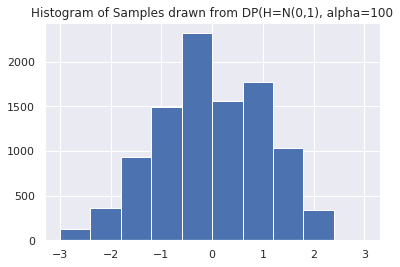

In [12]:
import matplotlib.pyplot as plt
Series(norm_dp() for _ in range(10000)).hist(range=(-3,3))
_=plt.title("Histogram of Samples drawn from DP(H=N(0,1), alpha=100")

If we where to use this distribution (denoted as $H_1$) as a parameter in another DP with $\alpha = 10$. This will be a $HDP(H_1,\alpha = 10)$

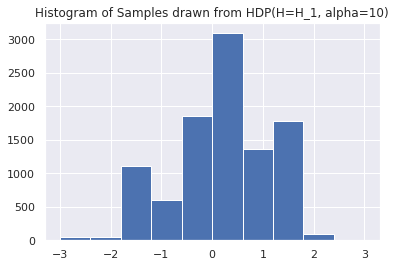

In [13]:
norm_hdp = DirichletProcessSample(norm_dp, alpha=10)
Series(norm_hdp() for _ in range(10000)).hist(range=(-3,3))
_=plt.title("Histogram of Samples drawn from HDP(H=H_1, alpha=10)")

Because $\alpha$ is relative small, the stochastic memoizer will reuse values it have seen with higher probability causing the distribution to be similiar to $H_1$